# Regression

In [11]:
#Import needed labraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn import metrics
from sklearn.metrics import  classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score 
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from matplotlib.pylab import rcParams



#Import our dataset after age scaling 
data_set = pd.read_excel('ENB2012_data.xlsx')
#Setting our features in X 
X = data_set.drop('Y1', axis=1)
X = data_set.drop('Y2', axis=1)
#Setting our output1 in Y1
Y = data_set['Y1']


#Splitting our data into of trainig set and on testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)


##Training

In [20]:
#Neural Network with 3 layers layer1=>200  layer2=>100  layer3=>100  alpha=0.0001 max iter=10000 
mlp = MLPRegressor(hidden_layer_sizes = [100,50,20],max_iter=10000, activation = 'logistic',solver='adam',  random_state = 0).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(576, 9)
(192, 9)



**solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’** : The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

**Activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’**: Activation function for the hidden layer.

## Prediction Accuracy

In [21]:
train_prediction = mlp.score(X_train,y_train)
print('The training set accuracy is:',train_prediction)
test_prediction = mlp.score(X_test,y_test)
print('The testing set accuracy is:',test_prediction)

The training set accuracy is: 0.981578908766803
The testing set accuracy is: 0.98051881278501


## Model Loss curve for Heating Load (Y1)

Cost for Heating Load (Y1) 0.9300396556139137


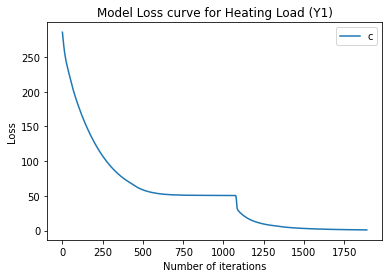

In [17]:
pd.DataFrame(mlp.loss_curve_).plot(title="Model Loss curve for Heating Load (Y1)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend("cost",loc="best")
m=len(mlp.loss_curve_)-1
print("Cost for Heating Load (Y1)",mlp.loss_curve_[m])